In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


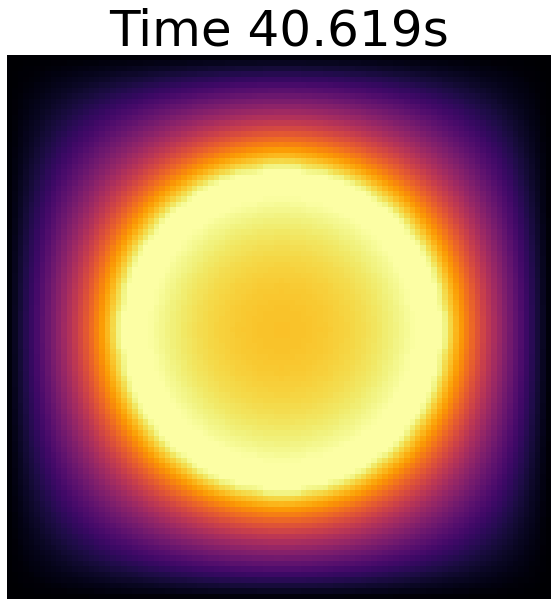

In [44]:
results = np.loadtxt('./outputs/output_TorusonoffFixedLong_freq_.00_00')
data = []
for i in range(len(results)):
    data.append((results[i][1:].reshape(100,100)))
data = np.array(data)

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Create an empty plot
im = ax.imshow(data[0], cmap='inferno')
# cbar = fig.colorbar(im)

# Set the colorbar minimum to 300
# im.set_clim(vmin=300, vmax=np.max(data[0]))
# cbar = fig.colorbar(im)
ax.set_frame_on(False)
ax.set_axis_off()
# Define the update function for the animation
def update(frame):
    ax.set_title(f'Time {(int(results[frame][0]*1000)/1000):.3f}s', size = 50)  # Set the title to the current frame
    im.set_array(data[frame])  # Update the plot with new data
    im.set_clim(vmin=300, vmax=np.max(data[frame]))  # Update the color limits
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(data), interval=1, blit=True)
# writer = animation.writers['ffmpeg']
# write = animation.FFMpegWriter(metadata=dict(artist='Me'), bitrate=1800)
# Save the animation
ani.save('TorusONOFFLong.gif', writer='pillow', fps=100, savefig_kwargs={"transparent": True, "facecolor": "none"})

# Display the animation
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

0.0
290.0
590.0
890.0


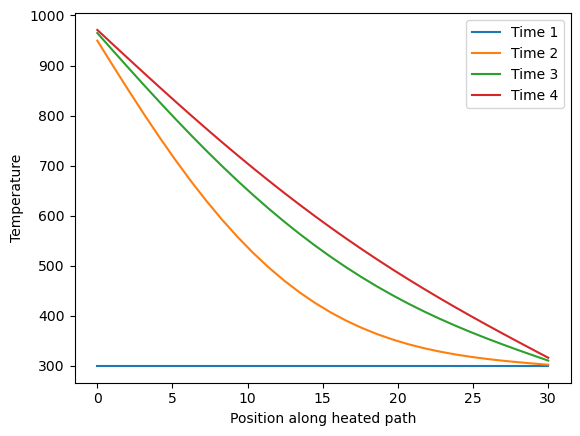

In [44]:
resultsF = np.loadtxt('./outputs/output_Doppler_freq_.00_38')
results = np.loadtxt('./outputs/output_DopplerCat_freq_.00_09')
data = []
time = []
dataF = []
timeF = []
for i in range(len(resultsF)):
    timeF.append(resultsF[i][0])
    dataF.append((resultsF[i][1:].reshape((30,1), order='F')))
position = np.linspace(0, 30, 30)
for i in range(len(results)):
    time.append(results[i][0])
    data.append((results[i][1:].reshape((10,11), order='F')))
# Dif = []
# for j in range(len(data)):
#     h=[]
#     for i in range(10):
#         h.append(data[j][i,6]-dataF[j][i,6])
#     Dif.append(h)
# plt.plot(position, data[-1][:,6])
# plt.plot(position, dataF[-1][:,6])
# plt.show()
# for i in range(len(Dif)):
#     if (i % 1000) == 0:
#         plt.plot(position, Dif[i], label=f'Time {time[i]:.3f}')
# plt.xlabel('Position along heated path')
# plt.ylabel('Difference in temperature, between with and without cat')
# # plt.legend()
# plt.show()
# #Plot each quadrant
# quad1 = []
# quad2 = []
# quad3 = []
# quad4 = []

# for i in range(len(data)):
#     h1 = []
#     h2 = []
#     h3 = []
#     h4 = []
#     for j in range(10):
#         for k in range(11):
#             if j < 5 and k < 5:
#                 h1.append(data[i][j,k]-dataF[i][j,k])
#             elif j < 5 and k > 5:
#                 h2.append(data[i][j,k]-dataF[i][j,k])
#             elif j > 5 and k < 5:
#                 h3.append(data[i][j,k]-dataF[i][j,k])
#             elif j > 5 and k > 5:
#                 h4.append(data[i][j,k]-dataF[i][j,k])
#     quad1.append(np.mean(h1))
#     quad2.append(np.mean(h2))
#     quad3.append(np.mean(h3))
#     quad4.append(np.mean(h4))
# plt.plot(time, quad1, label='Quadrant 1=Bottom Left')
# plt.plot(time, quad2, label='Quadrant 2=Top Left')
# plt.plot(time, quad3, label='Quadrant 3=Bottom right')
# plt.plot(time, quad4, label='Quadrant 4=Top Right')
# plt.legend()
# plt.show()
plt.clf()
count = 0
for i in range(len(dataF)):
    if (i % 30) < 0.01:
        count += 1
        print(timeF[i])
        plt.plot(position, dataF[i][:,0], label=f'Time {count}')
plt.xlabel('Position along heated path')
plt.ylabel('Temperature')
plt.legend()
plt.show()


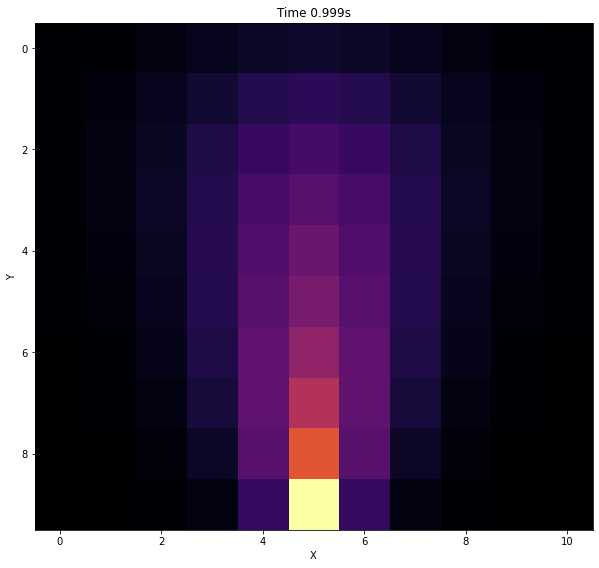

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load the data from the previous cell
results = np.loadtxt('./outputs/output_DopplerCat_freq_.00_03')
data = []
time = []
for i in range(len(results)):
    if i % 1000 == 0:
        time.append(results[i][0])
        data.append((results[i][1:].reshape((10,11), order='F')))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Create an empty plot
im = ax.imshow(data[0], cmap='inferno')

# Set the colorbar minimum to 300
im.set_clim(vmin=300, vmax=np.max(data[0]))

# Set the title and labels
ax.set_title(f'Time {(int(time[0]*1000)/1000):.3f}s')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Define the update function for the animation
def update(frame):
    ax.set_title(f'Time {(int(time[frame]*1000)/1000):.3f}s')  # Set the title to the current frame
    im.set_array(data[frame])  # Update the plot with new data
    im.set_clim(vmin=300, vmax=np.max(data[frame]))  # Update the color limits
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(data), interval=1, blit=False)

# Save the animation as a GIF
ani.save('doppler_cat.gif', writer='pillow', fps=100)

# Display the animation
plt.show()
